# Seaborn - 기본 그래프

## #01. 준비작업

### [1] 패키지 참조

In [1]:
import sys
import seaborn as sb
from matplotlib import pyplot as plt
from pandas import read_excel, melt
import numpy as np

### [2] 그래프 초기화

In [2]:
plt.rcParams['font.family']='AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams['font.size']=12
plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['axes.unicode_minus']=False

## #02. 기본 그래프

pie 그래프는 제공되지 않음

### [1] 선 그래프

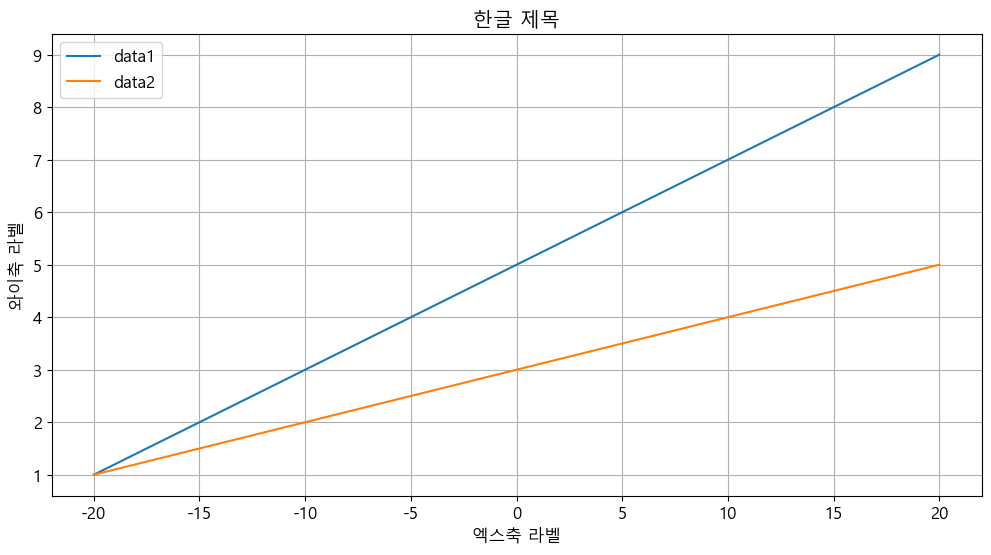

In [3]:
plt.figure()

sb.lineplot(x=[-20,-10,0,10,20],y=[1,3,5,7,9],label = 'data1')
sb.lineplot(x=[-20,-10,0,10,20],y=[1,2,3,4,5],label = 'data2')

plt.title('한글 제목')
plt.xlabel('엑스축 라벨')
plt.ylabel('와이축 라벨')
plt.legend()
plt.grid()
plt.show()
plt.close()

### [2] 세로 막대 그래프

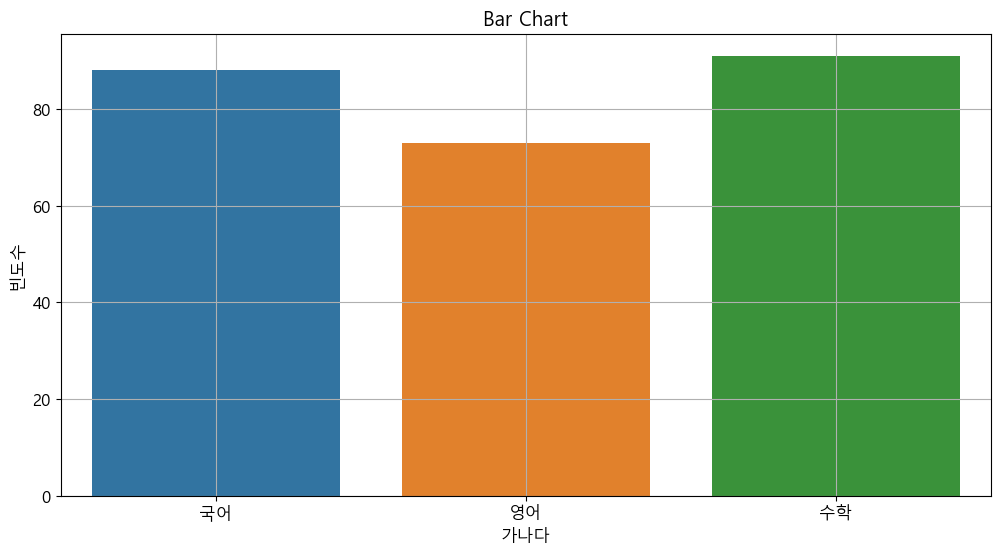

In [4]:
plt.figure()

sb.barplot(x=['국어','영어','수학'], y=[88,73,91])
plt.title('Bar Chart')
plt.xlabel('가나다')
plt.ylabel('빈도수')
plt.grid()
plt.show()
plt.close()

### [3] 가로 막대 그래프

기본 제공 팔레트

x축과 y축을 바꿔서 설정한다.

색상 테마를 변경하고자 한다면 `palette` 파라미터에 `deep, muted, pastel, bright, dark, colorblind, Spectral` 등의 값을 설정할 수 있다.

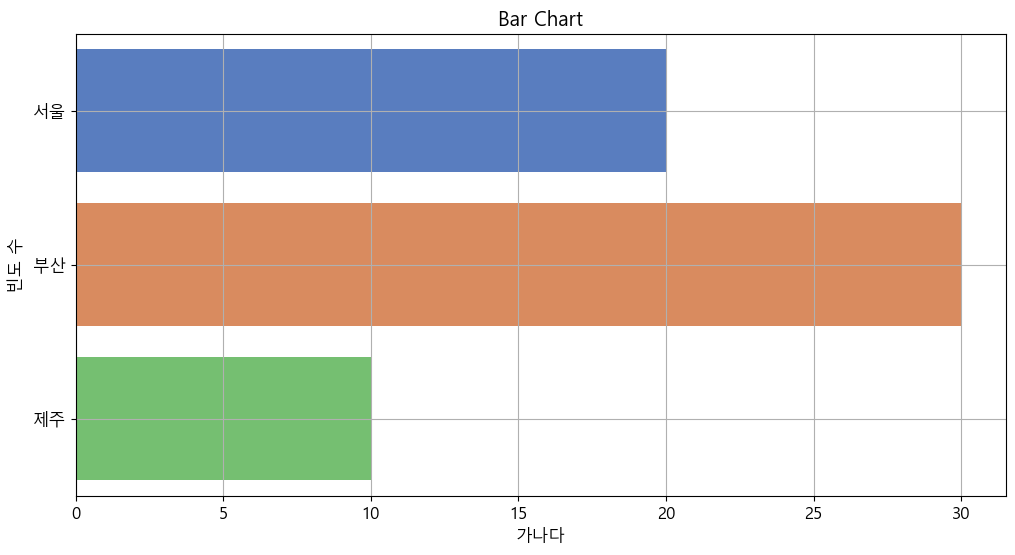

In [5]:
plt.figure()

sb.barplot(x=[20,30,10], y=['서울','부산','제주'], label='data', palette='muted')
plt.grid()
plt.title('Bar Chart')
plt.xlabel('가나다')
plt.ylabel('빈도 수')
plt.show()
plt.close()

### [4] 산점도 그래프

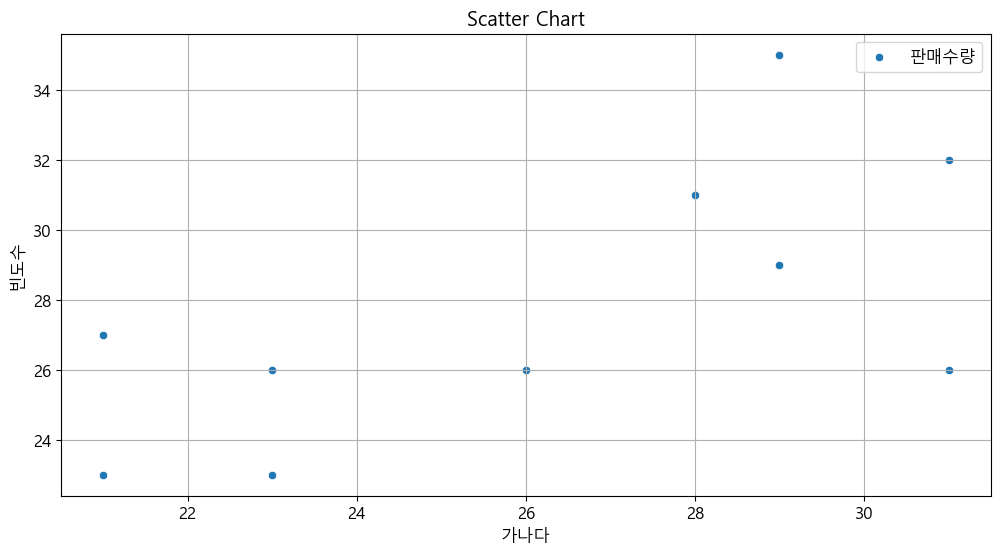

In [6]:
plt.figure()

tmp = list(np.random.randint(20,33,10))
qty = list(np.random.randint(20,40,10))

sb.scatterplot(x=tmp,y=qty,label='판매수량')

plt.title('Scatter Chart')
plt.grid()
plt.xlabel('가나다')
plt.ylabel('빈도수')
plt.show()
plt.close()


## #03. 데이터 프레임을 통한 그래프

### [1] 데이터 준비

#### (1) 데이터 가져오기

In [8]:
origin = read_excel('C:/Users/J/Desktop/Data_Science/Class/D.탐색적데이터분석/수업data/traffic_acc.xlsx')
origin.head()

,년도,월,발생건수,사망자수,부상자수
0,2005,1,15494,504,25413
1,2005,2,13244,431,21635
2,2005,3,16580,477,25550
3,2005,4,17817,507,28131
4,2005,5,19085,571,29808


#### (2) 데이터 전처리

연도별 월 평균 데이터로 전처리 수행

In [13]:
df = origin.drop('월',axis=1).groupby('년도').mean()
df2 = df.head()

In [17]:
df3 = df2[['사망자수','부상자수']]
df3['부상자수'] = df3['부상자수'].astype('int')
df3['사망자수'] = df3['사망자수'].astype('int')

C:\Users\J\AppData\Local\Temp\ipykernel_37420\726646055.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['부상자수'] = df3['부상자수'].astype('int')
C:\Users\J\AppData\Local\Temp\ipykernel_37420\726646055.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['사망자수'] = df3['사망자수'].astype('int')


In [25]:
df4 = df3.reset_index()
df4

,년도,사망자수,부상자수
0,2005,531,28519
1,2006,527,28352
2,2007,513,27992
3,2008,489,28246
4,2009,486,30156


### [2] 선 그래프

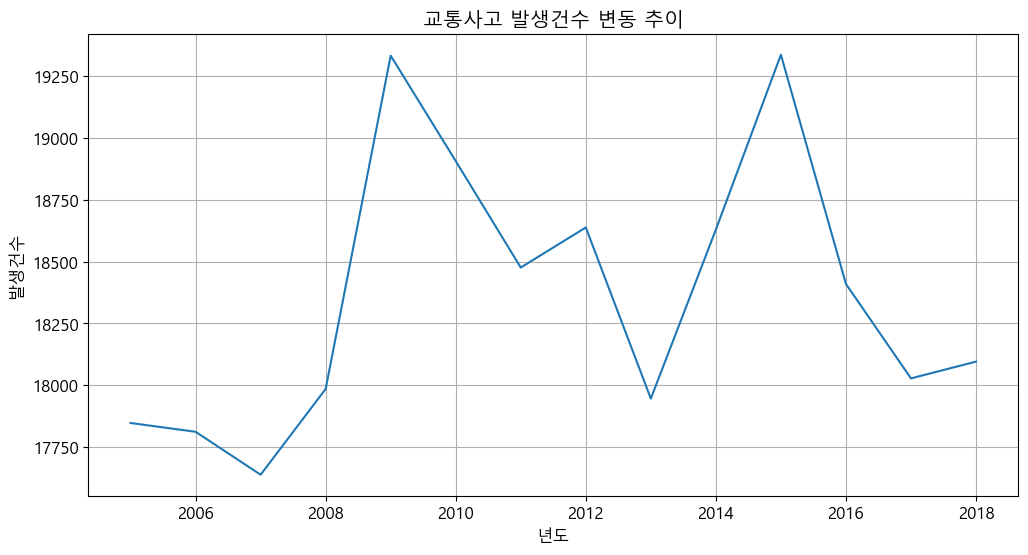

In [11]:
plt.figure()

sb.lineplot(data=df, x=df.index, y='발생건수')

plt.title('교통사고 발생건수 변동 추이')
plt.xlabel('년도')
plt.ylabel('발생건수')
plt.grid()
plt.show()
plt.close()

### [3] 막대 그래프

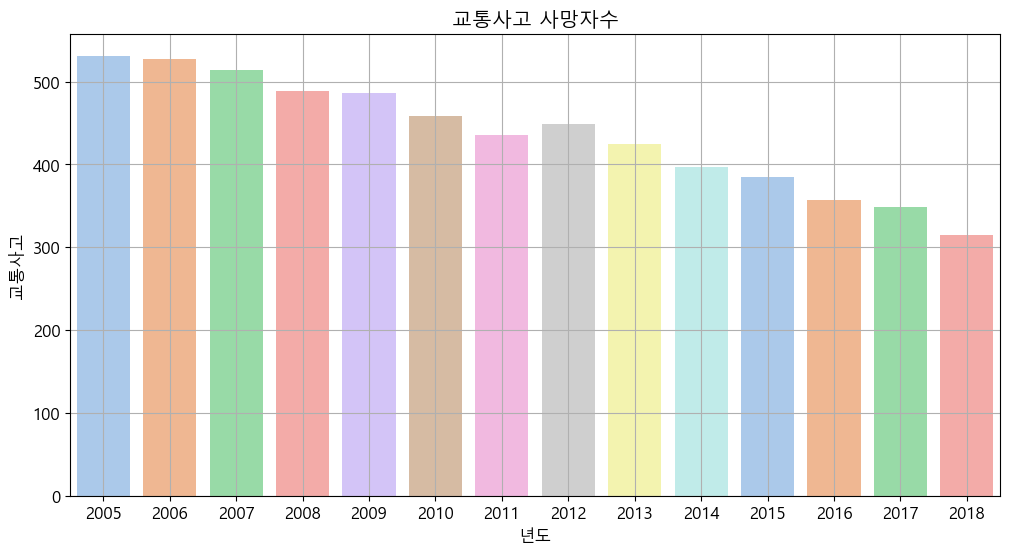

In [10]:
plt.figure()

sb.barplot(data=df, x=df.index, y='사망자수', palette='pastel')

plt.title('교통사고 사망자수')
plt.xlabel('년도')
plt.ylabel('교통사고')
plt.grid()
plt.show()
plt.close()

<Axes: xlabel='년도'>

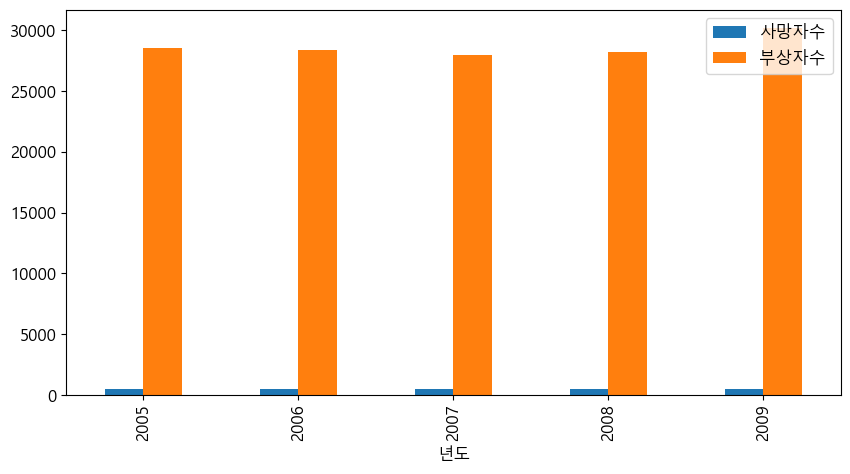

In [28]:
df4.plot.bar(x='년도', stacked=False, figsize=(10,5))

In [32]:
df4['adsf'] = \
df4[['사망자수','부상자수']].apply(lambda series: series.prod(), axis=1)
df4

,년도,사망자수,부상자수,adsf
0,2005,531,28519,15143589
1,2006,527,28352,14941504
2,2007,513,27992,14359896
3,2008,489,28246,13812294
4,2009,486,30156,14655816


### [4] 산점도 그래프

#### (1) 기본 산점도 그래프

`seaborn` 객체의 `scatterplot()` 메서드를 사용한다.

필요한 경우 `hue` 파라미터를 사용하여 두 개 이상의 지표에 대한 상관관계를 비교할 수 있다.

#### (2) 복수 변수에 대한 산점도 비교

##### 데이터 전처리

In [ ]:
#df.head()
df2 = melt(df,id_vars=['발생건수'], value_vars=['부상자수','사망자수']).sort_values('발생건수')
df2.head()

,발생건수,variable,value
2,17638.500000,부상자수,27992.166667
16,17638.500000,사망자수,513.833333
1,17812.083333,부상자수,28352.416667
15,17812.083333,사망자수,527.250000
0,17847.583333,부상자수,28519.416667


##### 데이터 시각화

#### (3) 추세선을 포함한 산점도 그래프

`seaborn` 객체의 `regplot()` 메서드를 사용한다.

추세선 주변에 보이는 구간은 `95%` 신뢰구간임

`fit_reg=False`를 추가하면 추세선이 표시되지 않게 되어 scatterplot 메서드와 동일한 결과를 보여준다(기본값=True)

`ci` 파라미터는 신뢰수준을 설정하며 기본값은 `95`이다.

`line_kws` 파라미터는 선의 색상, `scatter_kws`는 점의 색상

`hue` 파라미터를 사용할 수 없다.

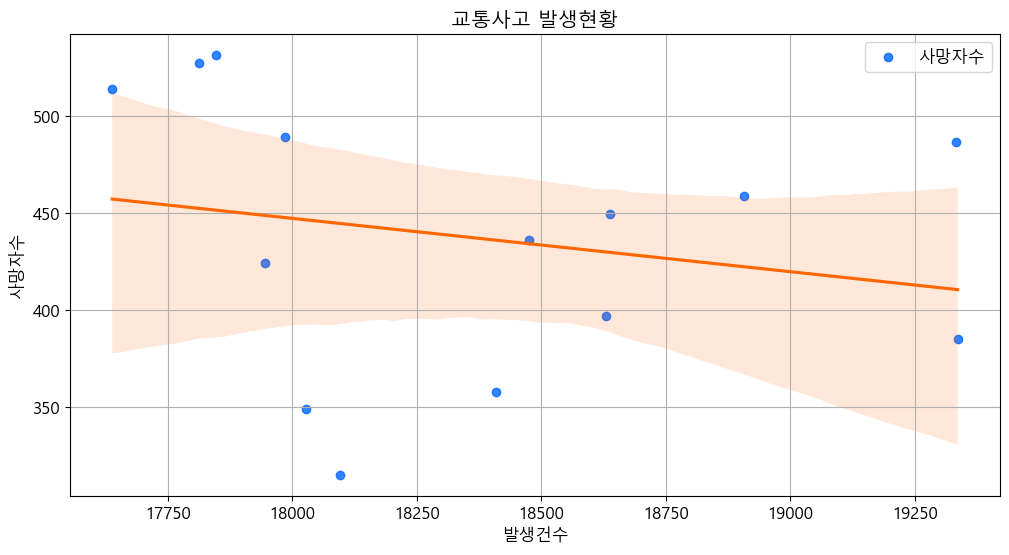

In [ ]:
sb.regplot(data=df,x='발생건수',y='사망자수',label='사망자수',
           line_kws={'color':'#ff6600'}, scatter_kws={'color':'#0066ff'})


plt.title('교통사고 발생현황')
plt.xlabel('발생건수')
plt.ylabel('사망자수')
plt.legend()
plt.grid()
plt.show()
plt.close()


### [5] 서브플롯에 기반한 선 그래프

> 서브 플롯을 사용하지 않을 경우 `sb.lineplot()` 함수에서 `ax` 파라미터 제거

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


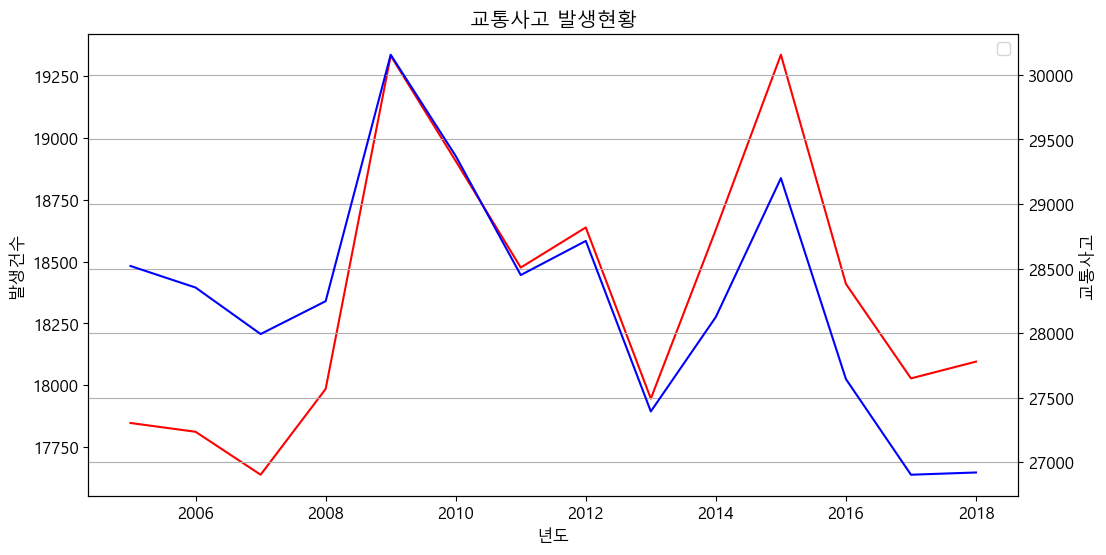

In [ ]:
fig, ax1 = plt.subplots(1,1)
ax2 = ax1.twinx()

sb.lineplot(data=df,x=df.index,y='발생건수', color='#ff0000',ax=ax1)
sb.lineplot(data=df,x=df.index,y='부상자수', color='#0000ff',ax=ax2)

plt.title('교통사고 발생현황')
plt.xlabel('년도')
plt.ylabel('교통사고')
plt.legend()
plt.grid()
plt.show()
plt.close()
